
# Algoritmos basados en árboles de decisión
Los algoritmos basados en árboles de decisión también son de aprendizaje supervisado y se pueden usar para tareas de regresión o clasificación.

El nombre de esta familia se debe a que usan una estructura básica, los árboles precisamente, que con simples reglas de decisión aplicadas sobre los datos les permite generar predicciones.

* Aprenden de los datos con reglas if-else en cada nodos. 

* Cada nodo representa una pregunta sobre los datos y cada rama del árbol representa una respuesta a esa pregunta. 

* El proceso continúa hasta que se llega a una hoja del árbol, que representa la predicción final.

* Desventaja:  Tendencia al sobreajuste u overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de poda o regularización.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


#leer datos
data = pd.read_csv('pid.100.csv')
dataset = data[3:]

dataset

,x,y,z,e,pt,p,px,py,pz,mass,ch,pid
3,5.75167,-0.963505,194.8180,3.697580,0.078794,3.584430,0.078725,0.003298,3.583560,0.907718,1,1
4,6.07983,0.588898,194.6590,5.127310,0.107422,5.044750,0.016830,0.106096,5.043600,0.916418,1,1
5,-14.03740,-4.391730,-32.1901,0.949517,0.069311,0.147441,-0.068983,-0.006730,-0.130134,0.938000,1,1
6,8.86727,0.104678,194.0270,4.936680,0.254442,4.855220,-0.118410,0.225210,4.848550,0.893116,1,1
7,7.74449,-2.188510,194.6850,4.502720,0.136972,4.407740,-0.017702,0.135823,4.405610,0.919962,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
74476,-164.53900,-60.093200,-38.1622,0.535546,0.503220,0.517461,-0.466584,-0.188492,-0.120564,0.138000,1,101
74477,16.66670,9.301060,-195.4820,1.508630,0.157602,1.502310,0.133255,0.084151,-1.494020,0.138000,0,101
74478,-24.84270,-61.705500,171.2720,0.364294,0.145348,0.337144,-0.051908,-0.135763,0.304204,0.138000,-1,101
74479,15.94690,22.618600,191.0670,0.727271,0.150121,0.714058,0.052114,0.140785,0.698099,0.138000,-1,101


In [2]:
print(pd.Series(dataset['pid']).value_counts(sort = True))

y = dataset['pid']# variable dependiente
x = dataset.drop(['pid'], axis=1) #  variable independiente


pid
 1      40637
 101    28306
 106     2317
-106     1019
 102      879
 40       630
 27       575
 49        54
-1         48
-40        10
-49         2
-27         1
Name: count, dtype: int64


In [3]:
#separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(59582, 11) (14896, 11) (59582,) (14896,)


## Índice de Gini 

* Probabilidad de que una característica específica se clasifique incorrectamente cuando se selecciona al azar.

* Rango entre 0 (un corte puro) a 0.5 (corte completamente puro que divide los datos en partes iguales). 

\begin{equation}
Gini = 1 - \sum_{i=1}^{n}(P_i)^2
\end{equation}

Donde $P_i$ es la probabilidad de que un elemento se clasifique en el grupo no adecuado. 


## Entropía.

Mide la aleatoriedad en los puntos de datos

\begin{equation}
E(S) = \sum_{i=1}^{c} -p_i log_2 (p_i)
\end{equation}

* El rango de la entropía va de 0 a 1. De esta forma, los valores cercanos a cero son menos impuros que aquellos que se acercan al 1.

In [4]:


# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

/home/isadoji/Storage/Software/miniconda3/envs/mspf2023/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.9926152418611209


In [5]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [6]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

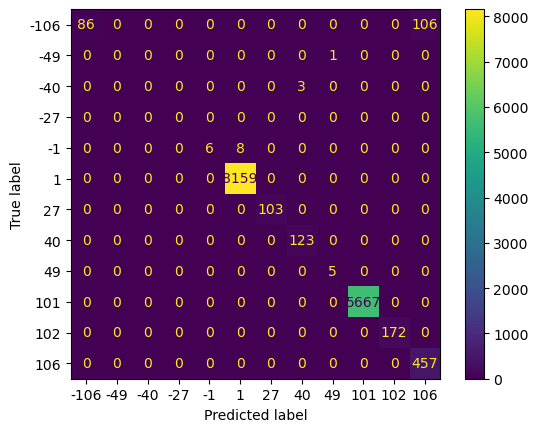

In [7]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [8]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 0.9926152193615522
El accuracy en test es: 0.992078410311493


In [10]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

        -106       1.00      0.45      0.62       192
         -49       0.00      0.00      0.00         1
         -40       0.00      0.00      0.00         3
          -1       1.00      0.43      0.60        14
           1       1.00      1.00      1.00      8159
          27       1.00      1.00      1.00       103
          40       0.98      1.00      0.99       123
          49       0.83      1.00      0.91         5
         101       1.00      1.00      1.00      5667
         102       1.00      1.00      1.00       172
         106       0.81      1.00      0.90       457

    accuracy                           0.99     14896
   macro avg       0.78      0.72      0.73     14896
weighted avg       0.99      0.99      0.99     14896



/home/isadoji/Storage/Software/miniconda3/envs/mspf2023/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/isadoji/Storage/Software/miniconda3/envs/mspf2023/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/isadoji/Storage/Software/miniconda3/envs/mspf2023/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1465: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [11]:


feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T


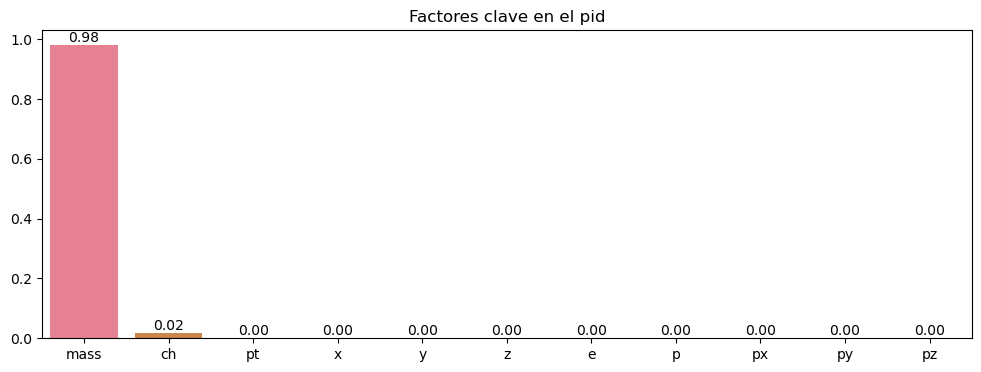

In [12]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en el pid")
plt.show()

[Text(0.3088235294117647, 0.9166666666666666, 'x[9] <= 0.316\ngini = 0.557\nsamples = 59582\nvalue = [827, 1, 7, 1, 34, 32478, 472, 507, 49, 22639, 707\n1860]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 22639\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 22639, 0, 0]'),
 Text(0.36764705882352944, 0.75, 'x[9] <= 0.696\ngini = 0.223\nsamples = 36943\nvalue = [827, 1, 7, 1, 34, 32478, 472, 507, 49, 0, 707\n1860]'),
 Text(0.17647058823529413, 0.5833333333333334, 'x[9] <= 0.52\ngini = 0.597\nsamples = 3394\nvalue = [827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 707, 1860]'),
 Text(0.11764705882352941, 0.4166666666666667, 'x[10] <= -0.5\ngini = 0.426\nsamples = 2687\nvalue = [827, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1860]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 408\nvalue = [408, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.17647058823529413, 0.25, 'x[10] <= 0.5\ngini = 0.3\nsamples = 2279\nvalue = [419, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1860]'),
 Text(0.11764705882352941, 0.08333333333333333, 'gini = 0.4

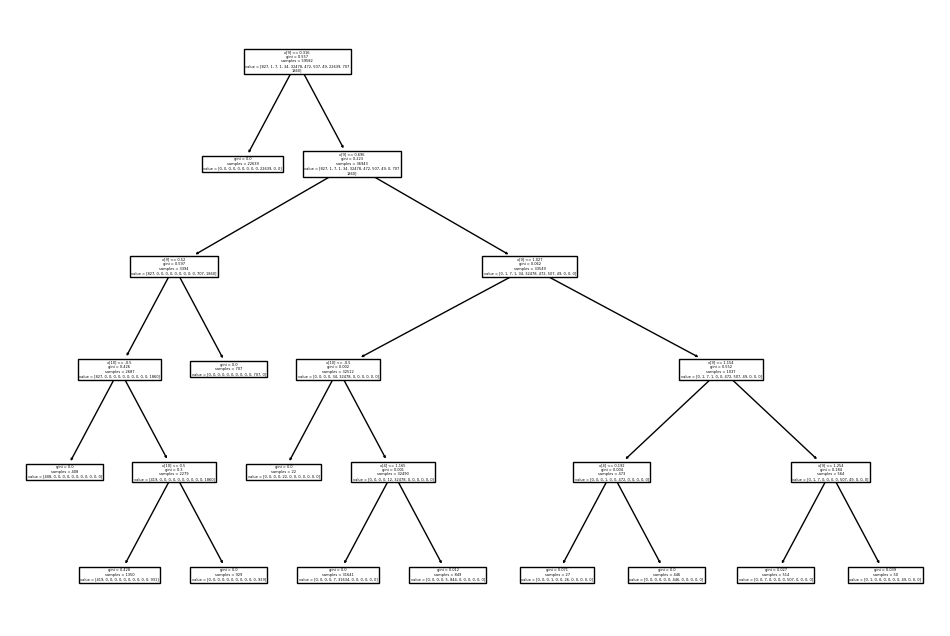

In [13]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, Y_train))

https://bookdown.org/keilor_rojas/CienciaDatos/introducci%C3%B3n-a-ciencia-de-datos-en-python.html